In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Исследовние

## Исследование времени работы RF-LOWESS в проследовательном и параллельном режимах

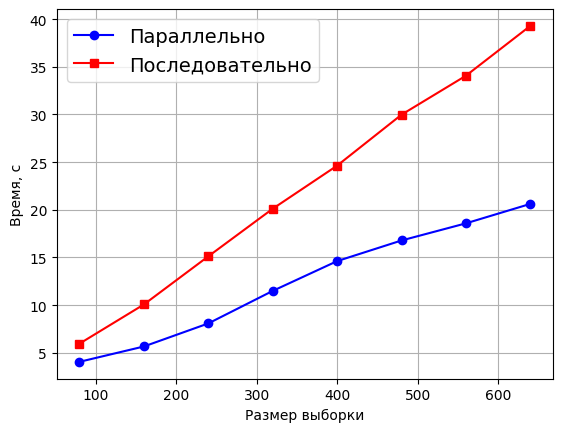

In [3]:
#plt.title(f'Средняя MAE из 500 испытаний')
plt.plot([80, 160, 240, 320, 400, 480, 560, 640], [4.058, 5.667, 8.084, 11.494, 14.619, 16.784, 18.581, 20.619], color='blue', label='Параллельно', marker='o')
plt.plot([80, 160, 240, 320, 400, 480, 560, 640], [5.961, 10.071, 15.118, 20.109, 24.630, 29.975, 34.062, 39.292], color='r', label='Последовательно', marker='s')
plt.ylabel('Время, с')
plt.xlabel('Размер выборки')
plt.legend(fontsize=14)
plt.grid()
plt.show()

## Исследовние зависимости МАЕ и MSE от меры шума 

In [9]:
ros_range_df = pd.read_csv('Comparison_tables/ros_range_data.csv', index_col=0)
display(ros_range_df.head())

,ros,huber_mae,tukey_mae,lowess_mae,sk_mae,huber_mse,tukey_mse,lowess_mse,sk_mse
0,0.01,0.064243,0.044626,0.046342,0.044802,0.014817,0.022715,0.017504,0.022531
1,0.05,0.066587,0.050897,0.050921,0.050829,0.015035,0.025060,0.018579,0.024845
2,0.10,0.074104,0.062084,0.060259,0.062279,0.016304,0.024353,0.018719,0.024073
3,0.15,0.081065,0.072445,0.069225,0.072616,0.017604,0.026092,0.020026,0.026014
4,0.20,0.089992,0.085632,0.081321,0.085815,0.018994,0.027185,0.021312,0.027010


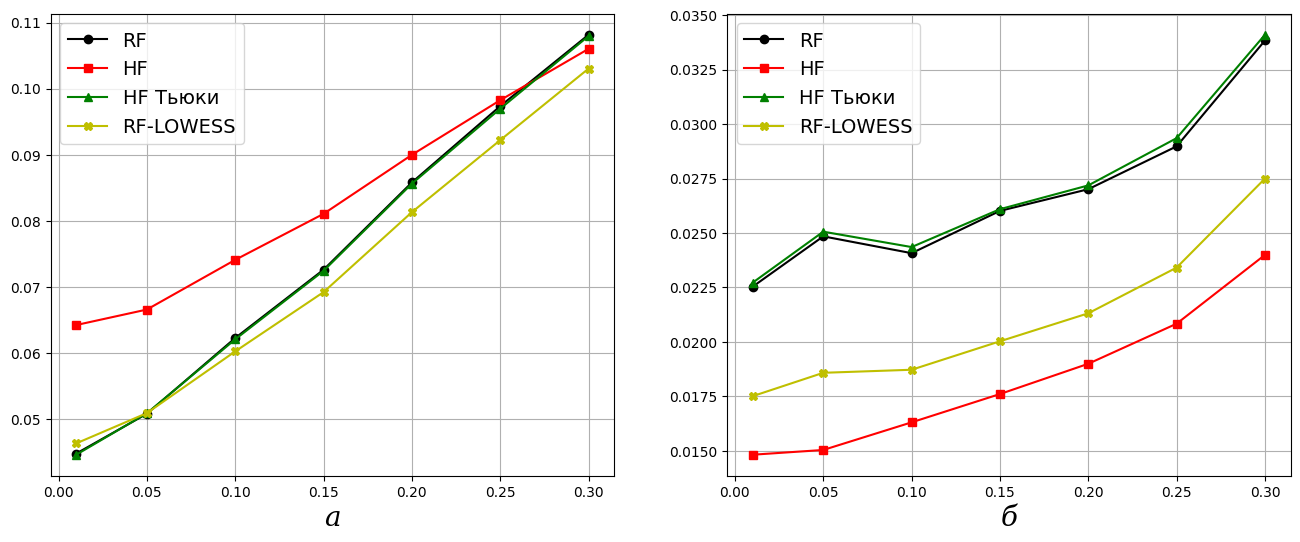

In [21]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
#plt.title(f'MAE')
plt.plot(ros_range_df['ros'], ros_range_df['sk_mae'], color='black', label='RF', marker='o')
plt.plot(ros_range_df['ros'], ros_range_df['huber_mae'], color='r', label='HF', marker='s')
plt.plot(ros_range_df['ros'], ros_range_df['tukey_mae'], color='g', label='HF Тьюки', marker='^')
plt.plot(ros_range_df['ros'], ros_range_df['lowess_mae'], color='y', label='RF-LOWESS', marker='X')
plt.xlabel('a', fontsize=20, style='italic', family='serif')
#plt.ylabel('Средняя MAE')
plt.grid()
plt.legend(fontsize=14)

plt.subplot(1, 2, 2)
#plt.title(f'MSE')
plt.plot(ros_range_df['ros'], ros_range_df['sk_mse'], color='black', label='RF', marker='o')
plt.plot(ros_range_df['ros'], ros_range_df['huber_mse'], color='r', label='HF', marker='s')
plt.plot(ros_range_df['ros'], ros_range_df['tukey_mse'], color='g', label='HF Тьюки', marker='^')
plt.plot(ros_range_df['ros'], ros_range_df['lowess_mse'], color='y', label='RF-LOWESS', marker='X')
plt.xlabel('б', fontsize=20, style='italic', family='serif')
#plt.ylabel('Средняя MSE')
plt.legend(fontsize=14)
plt.grid()
plt.savefig('Plots/ros_range.png')
plt.show()

## Исследовние зависимости МАЕ и MSE от размерности выборки

In [15]:
dims_range_df = pd.read_csv('Comparison_tables/dims_range_data.csv', index_col=0)
display(dims_range_df.head())

,dims,huber_mae,tukey_mae,lowess_mae,sk_mae,huber_mse,tukey_mse,lowess_mse,sk_mse
0,100,0.097377,0.078278,0.077356,0.078358,0.019563,0.027069,0.020714,0.026330
1,200,0.071074,0.064609,0.061984,0.064578,0.014960,0.023683,0.018954,0.023844
2,300,0.076174,0.060462,0.058740,0.061185,0.016250,0.024169,0.018573,0.024038
3,400,0.072239,0.063143,0.061248,0.063300,0.014763,0.023695,0.018790,0.023082
4,500,0.073486,0.061121,0.059303,0.061299,0.016086,0.024149,0.018366,0.023939


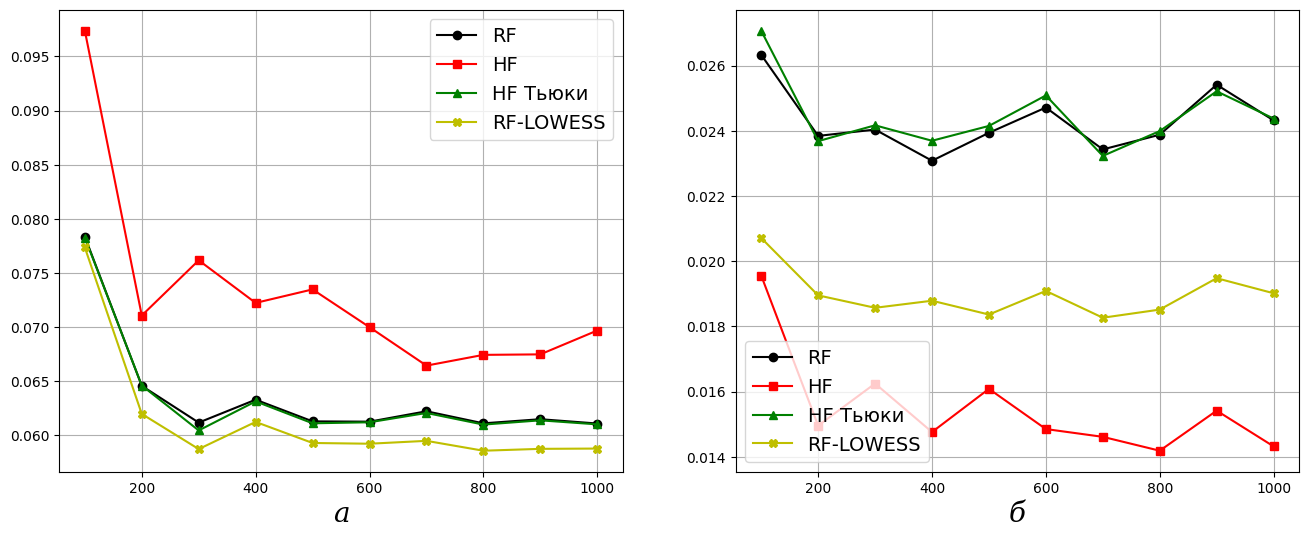

In [22]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
#plt.title(f'Средняя MAE из 500 испытаний')
plt.plot(dims_range_df['dims'], dims_range_df['sk_mae'], color='black', label='RF', marker='o')
plt.plot(dims_range_df['dims'], dims_range_df['huber_mae'], color='r', label='HF', marker='s')
plt.plot(dims_range_df['dims'], dims_range_df['tukey_mae'], color='g', label='HF Тьюки', marker='^')
plt.plot(dims_range_df['dims'], dims_range_df['lowess_mae'], color='y', label='RF-LOWESS', marker='X')
plt.xlabel('a', fontsize=20, style='italic', family='serif')
#plt.ylabel('Средняя MAE')
plt.legend(fontsize=14)
plt.grid()

plt.subplot(1, 2, 2)
#plt.title(f'Средняя MSE из 500 испытаний')
plt.plot(dims_range_df['dims'], dims_range_df['sk_mse'], color='black', label='RF', marker='o')
plt.plot(dims_range_df['dims'], dims_range_df['huber_mse'], color='r', label='HF', marker='s')
plt.plot(dims_range_df['dims'], dims_range_df['tukey_mse'], color='g', label='HF Тьюки', marker='^')
plt.plot(dims_range_df['dims'], dims_range_df['lowess_mse'], color='y', label='RF-LOWESS', marker='X')
plt.xlabel('б', fontsize=20, style='italic', family='serif')
#plt.ylabel('Средняя MSE')
plt.legend(fontsize=14)
plt.savefig('Plots/dims_range.png')
plt.grid()
plt.show()

## Исследовние зависимости МАЕ и MSE от параметра смеси

In [ ]:
alphas_range_df = pd.read_csv('Comparison_tables/alphas_range_data.csv', index_col=0)
display(alphas_range_df.head())

,alphas,huber_mae,tukey_mae,lowess_mae,sk_mae,huber_mse,tukey_mse,lowess_mse,sk_mse
0,0.95,0.067069,0.051091,0.051132,0.051241,0.015945,0.025159,0.018840,0.024986
1,0.90,0.088936,0.087632,0.082361,0.087838,0.027425,0.049478,0.037588,0.048875
2,0.85,0.107308,0.118287,0.109214,0.118317,0.036735,0.069763,0.052980,0.068759
3,0.80,0.127543,0.150317,0.137984,0.150549,0.047898,0.092457,0.071019,0.090982
4,0.75,0.146534,0.182597,0.166832,0.182648,0.059881,0.120184,0.092750,0.119149
5,0.70,0.165966,0.214132,0.195726,0.214381,0.072510,0.142921,0.111961,0.141656
6,0.65,0.182096,0.238675,0.218997,0.239125,0.083167,0.162453,0.129740,0.160868
7,0.60,0.202117,0.268042,0.248042,0.268198,0.094747,0.186386,0.150670,0.184717
8,0.55,0.223328,0.297146,0.277238,0.297527,0.110498,0.211666,0.175682,0.208776
9,0.50,0.240451,0.321728,0.302283,0.322584,0.123063,0.231404,0.196642,0.229078


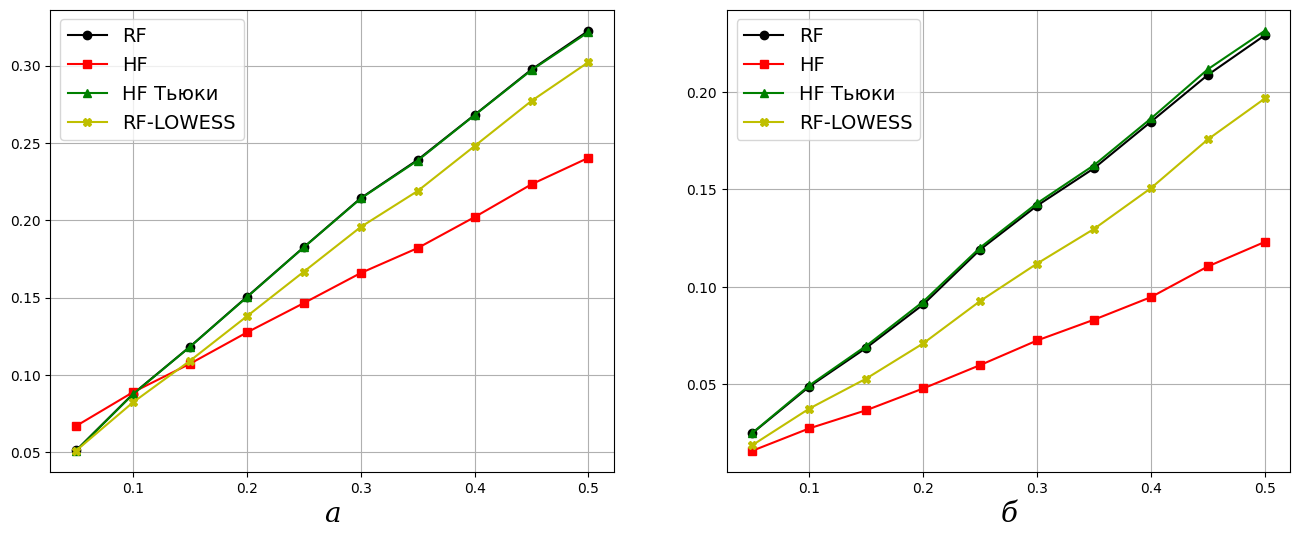

In [23]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
#plt.title(f'Средняя MAE из 500 испытаний')
plt.plot((1-alphas_range_df['alphas']), alphas_range_df['sk_mae'], color='black', label='RF', marker='o')
plt.plot((1-alphas_range_df['alphas']), alphas_range_df['huber_mae'], color='r', label='HF', marker='s')
plt.plot((1-alphas_range_df['alphas']), alphas_range_df['tukey_mae'], color='g', label='HF Тьюки', marker='^')
plt.plot((1-alphas_range_df['alphas']), alphas_range_df['lowess_mae'], color='y', label='RF-LOWESS', marker='X')
plt.xlabel('a', fontsize=20, style='italic', family='serif')
#plt.ylabel('Средняя MAE')
plt.grid()
plt.legend(fontsize=14)

plt.subplot(1, 2, 2)
#plt.title(f'Средняя MSE из 500 испытаний')
plt.plot((1-alphas_range_df['alphas']), alphas_range_df['sk_mse'], color='black', label='RF', marker='o')
plt.plot((1-alphas_range_df['alphas']), alphas_range_df['huber_mse'], color='r', label='HF', marker='s')
plt.plot((1-alphas_range_df['alphas']), alphas_range_df['tukey_mse'], color='g', label='HF Тьюки', marker='^')
plt.plot((1-alphas_range_df['alphas']), alphas_range_df['lowess_mse'], color='y', label='RF-LOWESS', marker='X')
plt.xlabel('б', fontsize=20, style='italic', family='serif')
#plt.ylabel('Средняя MSE')
plt.legend(fontsize=14)
plt.grid()
plt.savefig('Plots/alphas_range.png')
plt.show()

## Исследовние зависимости МАЕ и MSE от модуля выбросов

In [8]:
noise_modules_range_df = pd.read_csv('Comparison_tables/noise_modules_range_data.csv', index_col=0)
display(noise_modules_range_df.head())

,noise_modules,huber_mae,tukey_mae,lowess_mae,sk_mae,huber_mse,tukey_mse,lowess_mse,sk_mse
0,0.3,0.058380,0.033589,0.037015,0.033589,0.007546,0.004624,0.004514,0.004548
1,0.5,0.068069,0.047761,0.049854,0.047813,0.012121,0.011688,0.010555,0.011602
2,0.7,0.077194,0.063717,0.063461,0.063805,0.017996,0.023705,0.020019,0.023450
3,0.9,0.085462,0.078468,0.075418,0.078378,0.024488,0.040701,0.031940,0.040060
4,1.1,0.092097,0.094884,0.087356,0.094909,0.029673,0.058560,0.041736,0.057870


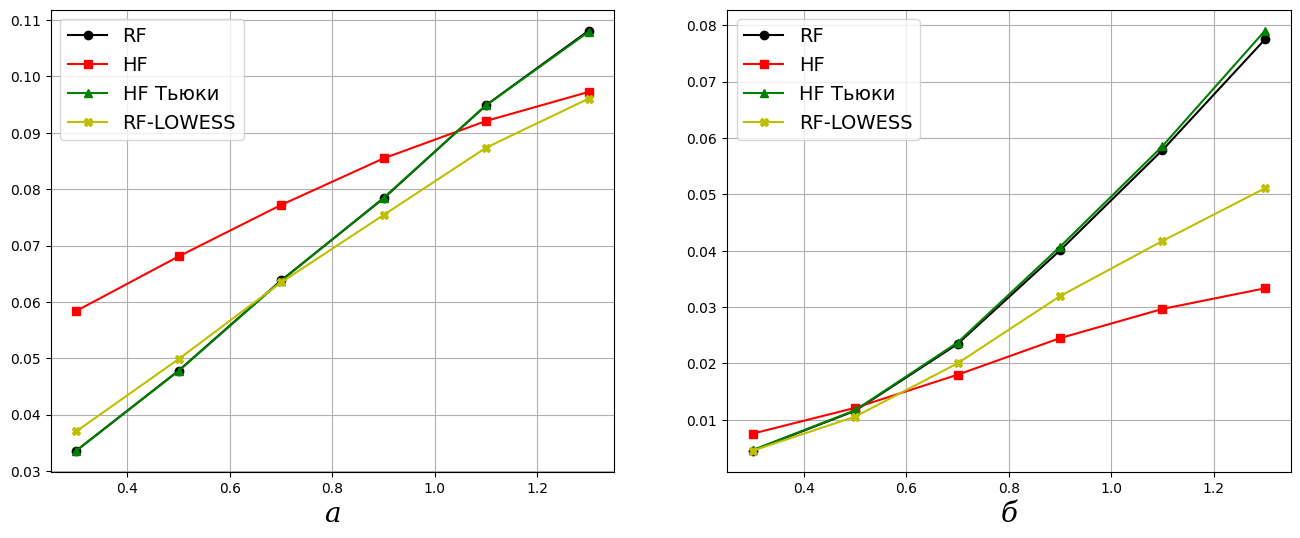

In [25]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
#plt.title(f'Средняя MAE из 500 испытаний')
plt.plot(noise_modules_range_df['noise_modules'], noise_modules_range_df['sk_mae'], color='black', label='RF', marker='o')
plt.plot(noise_modules_range_df['noise_modules'], noise_modules_range_df['huber_mae'], color='r', label='HF', marker='s')
plt.plot(noise_modules_range_df['noise_modules'], noise_modules_range_df['tukey_mae'], color='g', label='HF Тьюки', marker='^')
plt.plot(noise_modules_range_df['noise_modules'], noise_modules_range_df['lowess_mae'], color='y', label='RF-LOWESS', marker='X')
plt.xlabel('a', fontsize=20, style='italic', family='serif')
#plt.ylabel('Средняя MAE')
plt.grid()
plt.legend(fontsize=14)

plt.subplot(1, 2, 2)
#plt.title(f'Средняя MSE из 500 испытаний')
plt.plot(noise_modules_range_df['noise_modules'], noise_modules_range_df['sk_mse'], color='black', label='RF', marker='o')
plt.plot(noise_modules_range_df['noise_modules'], noise_modules_range_df['huber_mse'], color='r', label='HF', marker='s')
plt.plot(noise_modules_range_df['noise_modules'], noise_modules_range_df['tukey_mse'], color='g', label='HF Тьюки', marker='^')
plt.plot(noise_modules_range_df['noise_modules'], noise_modules_range_df['lowess_mse'], color='y', label='RF-LOWESS', marker='X')
plt.xlabel('б', fontsize=20, style='italic', family='serif')
#plt.ylabel('Средняя MSE')
plt.grid()
plt.legend(fontsize=14)
plt.savefig('Plots/noise_modules_range.png')
plt.show()